Comany, job in VN
Most likely skills required for top jobs (by salary, by demand)

## Exploratory Data Analysis

### Role to explore

In [17]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datasets import load_dataset
import ast
import seaborn as sns

# Loading data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data cleanup
df.job_posted_date = pd.to_datetime(df.job_posted_date)
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [12]:
df_DA_US = df[(df['job_title_short']=='Data Analyst') & (df['job_country']== 'United States')].copy()

In [43]:
# Top states:
df_top_states = df_DA_US.job_location.value_counts().sort_values(ascending=False).head(10).to_frame()
df_top_states

,count
job_location,
Anywhere,5106
"New York, NY",3035
"Atlanta, GA",2741
"Chicago, IL",2337
"Austin, TX",1919
"Dallas, TX",1862
"Washington, DC",1592
"Charlotte, NC",1433
"Tampa, FL",1431


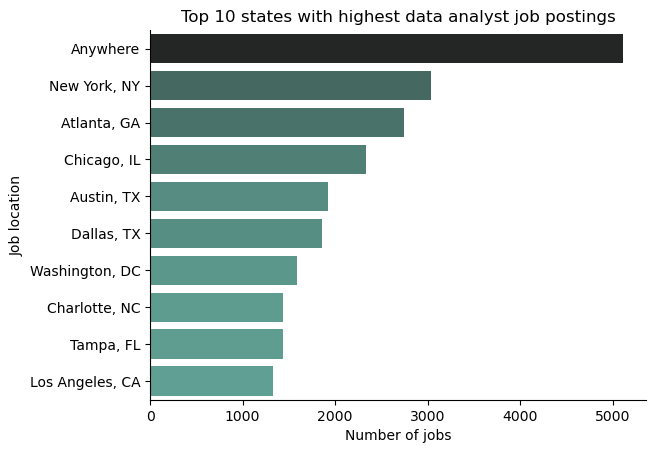

In [33]:
sns.barplot(df_top_states, x='count', y='job_location', legend=False, hue = 'count', palette ='dark:#5A9_r')
sns.despine()  #remove the plot border
plt.ylabel('Job location')
plt.xlabel('Number of jobs')
plt.title('Top 10 states with highest data analyst job postings')
plt.show()

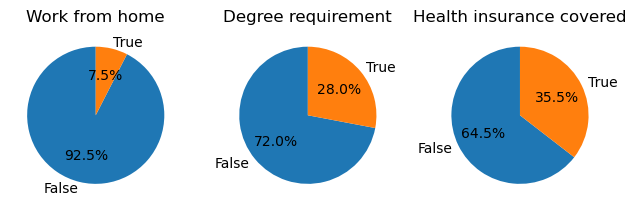

In [38]:
# Data Analyst job benefits

dict_column = {'job_work_from_home': 'Work from home', 'job_no_degree_mention': 'Degree requirement', 'job_health_insurance': 'Health insurance covered'}
fig, ax = plt.subplots(1,3)

for i, (column, title) in enumerate(dict_column.items()): # .items is used to get the key-value pair from the dictionary
    ax[i].pie(df_DA_US[column].value_counts(), startangle=90, autopct='%1.1f%%', labels =['False', 'True'])
    ax[i].set_title(title)


fig.tight_layout()

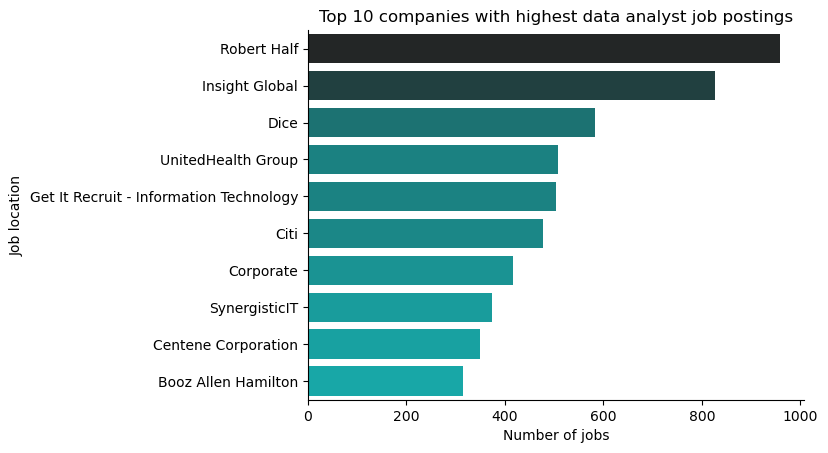

In [42]:
# Top companies:
df_top_states = df_DA_US.company_name.value_counts().sort_values(ascending=False).head(10).to_frame()

sns.barplot(df_top_states, x='count', y='company_name', legend=False, hue = 'count', palette ='dark:c_r')
sns.despine()  #remove the plot border
plt.ylabel('Job location')
plt.xlabel('Number of jobs')
plt.title('Top 10 companies with highest data analyst job postings')
plt.show()